Marta Kałużna (290283)

# Numerical Optimization

## Problem Set 3

#### Problem 3.1

In this problem we consider univariate function $f:\mathbb R\to\mathbb R$.

Implement the method `(a,b) = find_initial_bracket(f)` which for given function $f$ gives the bracketing interval $(a,b)$ such that there exist local minimum $c\in(a,b)$ satisfying $f(a)>f(c)<f(b)$.

In [394]:
import numpy as np

def find_initial_bracket(f, x=0, s=1e-2, k=2.0):
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    while True:
        c, yc = b + s, f(b + s)
        if yc > yb:
            if a > c:
                a, c = c, a
                return (a,c)
            else:
                return (a,c)
        a, ya, b, yb = b, yb, c, yc
        s = s*k

In [395]:
# Example test
f = lambda x: 3*x**2 + np.exp(.3*x-9) + 20*x - 20
(a,b)= find_initial_bracket(f)
print((a,b))

(-5.109999999999999, -1.27)


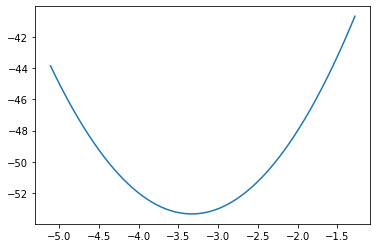

In [398]:
import matplotlib.pyplot as plt

x = np.arange(a, b, .01)
plt.plot(x, f(x))
plt.show()

#### Problem 3.2

In this problem we consider [unimodal function](https://www.wikiwand.com/en/Unimodality#/Unimodal_function)
and will play with _golden section search_ method.

First you should implement the _Fibonacci search_ algorithm provided that you have the (global) array of Fibonacci numbers. Next you should implement the _golden section search_ which uses only _golden ratio_ $\varphi = (1+\sqrt 5)/2$.

In [476]:
def fibonacci(n): 
    a = 0
    b = 1
    if n < 0: 
        print("Incorrect n") 
    elif n == 0: 
        return a 
    elif n == 1: 
        return b 
    else: 
        for i in range(2,n): 
            c = a + b 
            a = b 
            b = c 
        return b

##### Fibonacci search algorithm

In [516]:
def fibonacci_search(f, a, b, n, eps=1e-4):
    if n <= 1:
        print("Incorrect number of evaluations")
        
    N = 0
    F = round((b-a)/eps)
    C = fibonacci(N)
    while C < F:
        N += 1
        C = fibonacci(N)
        
    x1 = a + (fibonacci(N-2)/C)*(b-a)
    x2 = a + (fibonacci(N-1)/C)*(b-a)
    i = 1
    #print(i, (round(x1,4),round(x2,4)))
    while i < n:
        y1 = f(x1)
        y2 = f(x2)
        if y1 <= y2:
            a, b = x1, b
            x1 = x2
            x2 = a + (fibonacci(N-i-1)/fibonacci(N-i))*(b-a)
        else:
            a, b = a, x2
            x2 = x1
            x1 = a + (fibonacci(N-i-2)/fibonacci(N-i))*(b-a)
            
        if b - a < eps:
            return (a, b)
        
        i += 1
    return (a, b)

##### Golden section search

In [532]:
gr = (1 + np.sqrt(5))/2

def gs_search(f, a, b, n):                                                                                                                                             
    x1 = b - (b - a)/gr
    x2 = a + (b - a)/gr
    
    i = 1
    while i < n:
        y1 = f(x1)
        y2 = f(x2)
        if y1 < y2:
            a = x1
        else:
            b = x2

        x1 = b - (b - a) / gr
        x2 = a + (b - a) / gr
        
        i += 1
        
    return (a, b)

#### Examples

1. $f(x)=-x^2+21.6x+3$ over the interval $[0,20]$. Via calculus the maximum is at 10.8. The tolerance level is set to 0.001.

In [533]:
f = lambda x: -x**2 + 21.6*x + 3                                                                                                                            
a = 0                                                                                                                                             
b = 20
n1 = 21
eps = .001
n2 = int(np.ceil((b-a)/(eps*np.log(gr))))
fibonacci_search(f, a, b, n1, eps), gs_search(f, a, b, n2)
# both methods

((10.799455630386989, 10.800851449907526),
 (10.799999881041801, 10.799999881041803))

2. A function that doesn't have a derivative: $f(x) = -|2-x| + |5 - 4x| + |8 - 9x|$ over the interval $[0,3]$. The tolerance level is set to 0.1.

In [534]:
f = lambda x: -(abs(2-x)+abs(5-4*x)+abs(8-9*x))
a = 0
b = 3
eps = 0.1
n1 = 8
n2 = int(np.ceil((b-a)/(eps*np.log(gr))))
fibonacci_search(f, a, b, n1, eps), gs_search(f, a, b, n2)

((0.8823529411764706, 0.9705882352941178),
 (0.8888888888887204, 0.8888888888890514))

3. Minimize the function $f(x) = 2x^2-4x$ over $[-1,2]$. To minimize  f(x), we maximize $-f(x) = -2x^2+4x$. We keep the interval the same. The tolerance level is set to 0.01.

In [535]:
f = lambda x: -2*x**2+4*x
a = -1
b = 2
eps = 0.01
n1 = 7
n2 = int(np.ceil((b-a)/(eps*np.log(gr))))
fibonacci_search(f, a, b, n1, eps), gs_search(f, a, b, n2)

((0.9575596816976126, 1.1246684350132625),
 (0.9999999925077823, 0.9999999925077824))

#### Problem 3.3
$$ f(x) = x^4 + 16x^2 + 18(x-4) e^x\qquad (x\in\mathbb R) $$

In [554]:
from sympy import *

def my_func(x, order=0):
    x1 = x
    x = Symbol('x')
    f = x**4 + 16*x**2 + 18*(x-4)*exp(x)
    fx = lambdify(x,f)
    value = fx(x1)
    if order == 0:
        return value
    elif order == 1:
        f_prime = diff(f)
        f_prime = lambdify(x, f_prime)
        gradient = f_prime(x1)
        return value, gradient
    
my_func(4, order = 1)

(512.0, 1366.7667005965964)

I also added the version of **my_func** which works for every function f:

In [719]:
def my_func2(f, x1, order=0):
    fx = lambdify(x,f)
    value = fx(x1)
    if order == 0:
        return value
    elif order == 1:
        f_prime = diff(f)
        f_prime = lambdify(x, f_prime)
        gradient = f_prime(x1)
        return value, gradient

x = Symbol('x')
f1 = x**4 + 16*x**2 + 18*(x-4)*exp(x)
f2 = -x**2 + 21.6*x + 3                                                                                                                            
f3 = -2*x**2 + 4*x
my_func2(f1, 4, 1), my_func2(f2, 0, 1), my_func2(f3, 1, 1)

((512.0, 1366.7667005965964), (3.0, 21.6), (2, 0))

**Bisection method**

In [727]:
def bisection(f, MIN, MAX, eps=1e-5, max_iter=10000):
    counter = 0
    while True:
        counter += 1
        MID = (MAX+MIN)/2
        
        suboptimality = (MAX-MIN)/2
        value, gradient = my_func2(f, MID, 1)
        if (value == 0 or suboptimality <= eps):
            break

        if gradient > 0:
            MAX = MID
        else:
            MIN = MID

        if counter == max_iter:
            break
            
    print("Number of Iterations: %d", counter)
    print("Suboptimal point: %1.15", MID)
    print("Suboptimal value: %1.15", value)
    return MID

In [728]:
x = Symbol('x')
f1 = x**4 + 16*x**2 + 18*(x-4)*exp(x)
bisection(f1, -10, 10)

Number of Iterations: %d 21
Suboptimal point: %1.15 2.3223209381103516
Suboptimal value: %1.15 -192.62418182967122


2.3223209381103516

In [735]:
x = Symbol('x')
f2 = -x**2 + 21.6*x + 3
bisection(f2, -10, 10)

Number of Iterations: %d 21
Suboptimal point: %1.15 -9.999990463256836
Suboptimal value: %1.15 -312.9996032715753


-9.999990463256836

#### Problem 3.4

Implement the **linesearch algorithm**.

In [660]:
def exact_line_search(f, x, d, eps=1e-9, max_iter=65536):
    y = Symbol('y')
    h = f(x + y*d)
    a, b = find_initial_bracket(h)
    alpha = bisection(h, a, b, eps, max_iter)
    return x + alpha*d

x = Symbol('x')
f = x**4 + 16*x**2 + 18*(x-4)*exp(x)

Unfortunately, the function above doesn't work fine, so I've implemented the second *exact_line_search* function in which I set the value of alpha at the beginning - it's changing inside of the loop.

In [701]:
def exact_line_search2(f, x, d, eps = 1e-9, max_iter = 65536):
    
    counter = 0 
    alpha = 10
    value, gradient = my_func2(f, x, order = 1)
    
    while counter <= max_iter:
        
        counter += 1
        x  = x + alpha*d
        value_k, gradient_k = my_func2(f, x, order = 1)
        
        if np.sign(gradient) != np.sign(gradient_k):
            d = -1*d
            alpha *= 0.1
        
        gradient = gradient_k
        
        if abs(gradient) <= eps:
            break
        
    return x, value_k, gradient, x + alpha*d, alpha

x = Symbol('x')
f = x**4 + 16*x**2 + 18*(x-4)*exp(x)
exact_line_search2(f, 2, 1)

(2.322324583129999,
 -192.62418183070685,
 2.461888470861595e-10,
 2.322324583128999,
 1.0000000000000006e-12)

#### Problem 3.5

In this problem you should implement **backtracking linesearch algorithm**.

In [700]:
def backtracking_line_search(f, x, direction, alpha=0.4, beta=0.9, maximum_iterations=65536):
    counter = 0
    t = 0.5
    value, gradient = my_func2(f, x, order = 1)
    if gradient*direction > 0 :
        direction = -1*direction
    while my_func2(f, x + alpha*direction) < value + alpha*beta*gradient*direction:
        alpha = alpha*t
        counter += 1
        if counter == maximum_iterations:
            return alpha
    return alpha

x = Symbol('x')
f = x**4 + 16*x**2 + 18*(x-4)*exp(x)
backtracking_line_search(f, 1, 1)

2.842170943040401e-15

In [746]:
x = Symbol('x')
f1 = -x**2 + 21.6*x + 3
backtracking_line_search(f1, 1, 1)

7.105427357601002e-16